In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from datasets import load_dataset


In [75]:
dataset = load_dataset("aai510-group1/telco-customer-churn")
train_data = dataset["train"].to_pandas()
validation_data = dataset["validation"].to_pandas()
test_data = dataset["test"].to_pandas()

In [76]:
train_data["Customer Status"].value_counts()

Customer Status
Stayed     2832
Churned    1121
Joined      272
Name: count, dtype: int64

In [77]:
state = {}
def preprocess_data(data):
    # Drop initial unwanted features
    columns_to_drop = ['Customer ID', 'Quarter', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Population', 'Senior Citizen', 'Under 30']
    data.drop(columns=columns_to_drop, axis=1, inplace=True)

    # Get the Stickiness Score and drop individual features
    data["Stickiness Score"] = data["Device Protection Plan"] + data["Premium Tech Support"] + data["Streaming TV"] + data["Streaming Movies"] + data["Streaming Music"]+ data["Online Security"] + data["Online Backup"] + data["Unlimited Data"]
    data.drop(columns=["Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music", "Online Security", "Online Backup", "Unlimited Data"], axis=1, inplace=True)

    # Fill Null values
    data["Churn Category"].fillna("No Category", inplace=True)
    data["Churn Reason"].fillna("Did not Churn", inplace=True)
    data["Offer"].fillna("None", inplace=True)

    # Encode Categorical Features
    object_cols = data.select_dtypes(include=['object']).columns.tolist()
    for col in object_cols:
        # if col not in state:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            state[col] = {"classes": le.classes_, "le": le}
        # else:
        #     le = state[col]["le"]
        #     data[col] = le.transform(data[col])
    
    # Drop post churn features
    data.drop(columns=["Churn Category", "Churn Reason", "Churn Score", "Customer Status"], axis=1, inplace=True)

    # Separate Boolean features from numerical features for scaling
    boolean_columns = data.columns[data.nunique() == 2].tolist()
    scaling_columns = data.drop(columns=boolean_columns, axis=1)

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(scaling_columns)
    scaled_data = pd.DataFrame(scaled_data, columns=scaling_columns.columns, index=data.index)
    
    final_data = pd.concat([scaled_data, data[boolean_columns]], axis=1)

    X = final_data.drop(columns=["Churn"], axis=1)
    y = final_data["Churn"]

    return final_data, X, y


In [78]:
preprocessed_train_data, X_train, y_train = preprocess_data(train_data)
preprocessed_train_data.head()

C:\Users\Sande\AppData\Local\Temp\ipykernel_23832\3198502938.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Churn Category"].fillna("No Category", inplace=True)
C:\Users\Sande\AppData\Local\Temp\ipykernel_23832\3198502938.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,City,CLTV,Contract,Internet Type,Monthly Charge,Number of Dependents,Number of Referrals,...,Churn,Dependents,Gender,Internet Service,Married,Multiple Lines,Paperless Billing,Partner,Phone Service,Referred a Friend
0,1.527172,-0.822092,-0.215642,0.920994,0.375279,1.473029,0.288641,0.785147,-0.49139,-0.327404,...,0,0,0,1,1,0,0,1,1,1
1,-1.162682,1.878793,1.481254,1.261375,-0.593571,-0.879919,0.288641,1.022427,-0.49139,-0.655897,...,0,0,1,1,0,1,0,0,1,0
2,0.750103,-1.018520,-0.434074,0.967713,0.582889,-0.879919,1.371687,-1.514128,-0.49139,0.329581,...,0,0,1,0,1,0,0,1,1,1
3,-1.282231,0.307369,-1.475675,-1.561783,-2.000709,0.296555,-0.794405,-0.636861,-0.49139,0.329581,...,0,0,1,1,1,0,1,1,0,1
4,-0.923583,0.012727,-0.359535,0.887623,-0.327863,0.296555,-1.877450,-0.153947,-0.49139,-0.327404,...,1,0,1,1,1,0,0,1,1,1


In [79]:
X_train.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,City,CLTV,Contract,Internet Type,Monthly Charge,Number of Dependents,Number of Referrals,...,Stickiness Score,Dependents,Gender,Internet Service,Married,Multiple Lines,Paperless Billing,Partner,Phone Service,Referred a Friend
0,1.527172,-0.822092,-0.215642,0.920994,0.375279,1.473029,0.288641,0.785147,-0.49139,-0.327404,...,0.796155,0,0,1,1,0,0,1,1,1
1,-1.162682,1.878793,1.481254,1.261375,-0.593571,-0.879919,0.288641,1.022427,-0.49139,-0.655897,...,0.381337,0,1,1,0,1,0,0,1,0
2,0.750103,-1.018520,-0.434074,0.967713,0.582889,-0.879919,1.371687,-1.514128,-0.49139,0.329581,...,-1.277932,0,1,0,1,0,0,1,1,1
3,-1.282231,0.307369,-1.475675,-1.561783,-2.000709,0.296555,-0.794405,-0.636861,-0.49139,0.329581,...,0.381337,0,1,1,1,0,1,1,0,1
4,-0.923583,0.012727,-0.359535,0.887623,-0.327863,0.296555,-1.877450,-0.153947,-0.49139,-0.327404,...,0.381337,0,1,1,1,0,0,1,1,1


In [80]:
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: Churn, dtype: int64

In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
preprocessed_test_data, X_test, y_test = preprocess_data(test_data)

C:\Users\Sande\AppData\Local\Temp\ipykernel_23832\3198502938.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Churn Category"].fillna("No Category", inplace=True)
C:\Users\Sande\AppData\Local\Temp\ipykernel_23832\3198502938.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [83]:
predictions = model.predict(X_test)
predictions_df = pd.DataFrame(predictions, columns=["Predicted Churn"], index=X_test.index)
predictions_df.head()

,Predicted Churn
0,0
1,0
2,0
3,0
4,0


In [84]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score
f1 = f1_score(y_test, predictions)
acc = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
print("F1 Score:", f1)
print("Accuracy:", acc)
print("Recall:", recall)
print("Precision:", precision)
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

F1 Score: 0.9124293785310734
Accuracy: 0.9559971611071683
Recall: 0.8636363636363636
Precision: 0.9670658682634731
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1035
           1       0.97      0.86      0.91       374

    accuracy                           0.96      1409
   macro avg       0.96      0.93      0.94      1409
weighted avg       0.96      0.96      0.96      1409

Confusion Matrix:
 [[1024   11]
 [  51  323]]


In [85]:
churned_predictions = pd.Series(predictions[predictions == 1])
# print(churned_predictions)
print([predictions_df["Predicted Churn"]==1])

[0       False
1       False
2       False
3       False
4       False
        ...  
1404    False
1405    False
1406    False
1407    False
1408    False
Name: Predicted Churn, Length: 1409, dtype: bool]


In [86]:
# boolean mask for predicted churn == 1
mask = predictions == 1

# numpy positional indices (0-based)
numpy_indices = np.where(mask)[0]

# original DataFrame index labels for those predictions
df_index_labels = X_test.index[mask]
# or using predictions_df
df_index_labels_alt = predictions_df[predictions_df["Predicted Churn"] == 1].index

print("numpy indices:", numpy_indices[:20])
print("df index labels:", df_index_labels[:20])

numpy indices: [ 9 13 20 26 27 29 34 36 39 45 49 51 55 61 64 65 66 67 68 69]
df index labels: Index([9, 13, 20, 26, 27, 29, 34, 36, 39, 45, 49, 51, 55, 61, 64, 65, 66, 67,
       68, 69],
      dtype='int64')


In [87]:
predictions_df["Predicted Churn"][20]

np.int64(1)

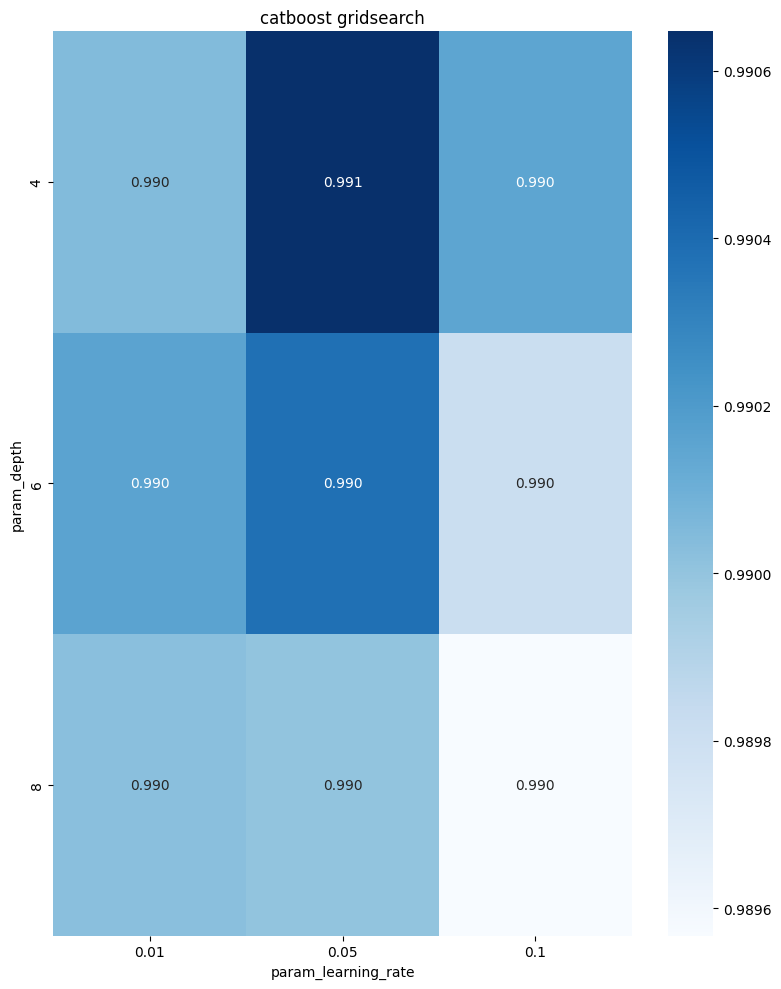

catboost: 0.9885
xgboost: 0.9879
random_forest: 0.9804
logistic_reg: 0.9850
decision_tree: 0.9062


C:\Users\Sande\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ann: 0.9835
               accuracy  precision  recall  f1_score  roc_auc
catboost         0.9448     0.9430  0.8514    0.8949   0.9885
xgboost          0.9464     0.9273  0.8743    0.9000   0.9879
logistic_reg     0.9464     0.9434  0.8571    0.8982   0.9850
ann              0.9432     0.9427  0.8457    0.8916   0.9835
random_forest    0.9511     0.9675  0.8514    0.9058   0.9804
decision_tree    0.9180     0.8324  0.8800    0.8556   0.9062


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.15, random_state=17)


class ANNClassifier:
    def __init__(self, num_epochs=20, batch_sz=128):
        self.num_epochs = num_epochs
        self.batch_sz = batch_sz
        self.nn = None
    
    def fit(self, X, y):
        X, y = np.asarray(X),np.asarray(y)
        self.nn = Sequential()
        self.nn.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
        self.nn.add(BatchNormalization())
        self.nn.add(Dropout(0.3))
        self.nn.add(Dense(64, activation='relu'))
        self.nn.add(BatchNormalization())
        self.nn.add(Dropout(0.25))
        self.nn.add(Dense(1, activation='sigmoid'))
        self.nn.compile(optimizer='adam', loss='binary_crossentropy')
        self.nn.fit(X, y, epochs=self.num_epochs, batch_size=self.batch_sz, verbose=0)
        return self
    
    def predict(self, X):
        probs = self.nn.predict(np.asarray(X), verbose=0).flatten()
        return (probs >= 0.5).astype(int)
    
    def predict_proba(self,X):
        return self.nn.predict(np.asarray(X), verbose=0).flatten()


catboost_base = CatBoostClassifier(verbose=0, random_state=17)

catboost_params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200,400,600]
}
grid_search_cv = GridSearchCV(catboost_base, catboost_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_cv.fit(X_tr, y_tr)

grid_results = pd.DataFrame(grid_search_cv.cv_results_)
heatmap_data = grid_results.pivot_table(values='mean_test_score', index='param_depth', columns='param_learning_rate')
plt.figure(figsize=(8,10))
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='Blues')
plt.title('catboost gridsearch')
plt.tight_layout()
plt.show()


classifiers = {
    'catboost': grid_search_cv.best_estimator_,
    'xgboost': XGBClassifier(random_state=17),
    'random_forest': RandomForestClassifier(n_estimators=150,random_state=17, max_depth=12),
    'logistic_reg': LogisticRegression(max_iter=500, C=0.8),
    'decision_tree': DecisionTreeClassifier(random_state=30),
    'ann': ANNClassifier(num_epochs=30)
}

model_results = {}

for clf_name in classifiers:

    clf = classifiers[clf_name]
    clf.fit(X_tr, y_tr)
    preds = clf.predict(X_te)
    
    if hasattr(clf, 'predict_proba'):
        probs = clf.predict_proba(X_te)
        if len(probs.shape) > 1:
            probs = probs[:,1]
    else:
        probs = preds
    
    model_results[clf_name] = {
        'accuracy': accuracy_score(y_te, preds),
        'precision': precision_score(y_te, preds),
        'recall': recall_score(y_te,preds),
        'f1_score': f1_score(y_te, preds),
        'roc_auc': roc_auc_score(y_te, probs)
    }
    print(f"{clf_name}: {model_results[clf_name]['roc_auc']:.4f}")
final_results = pd.DataFrame(model_results).T.sort_values('roc_auc', ascending=False)
print(final_results.round(4))

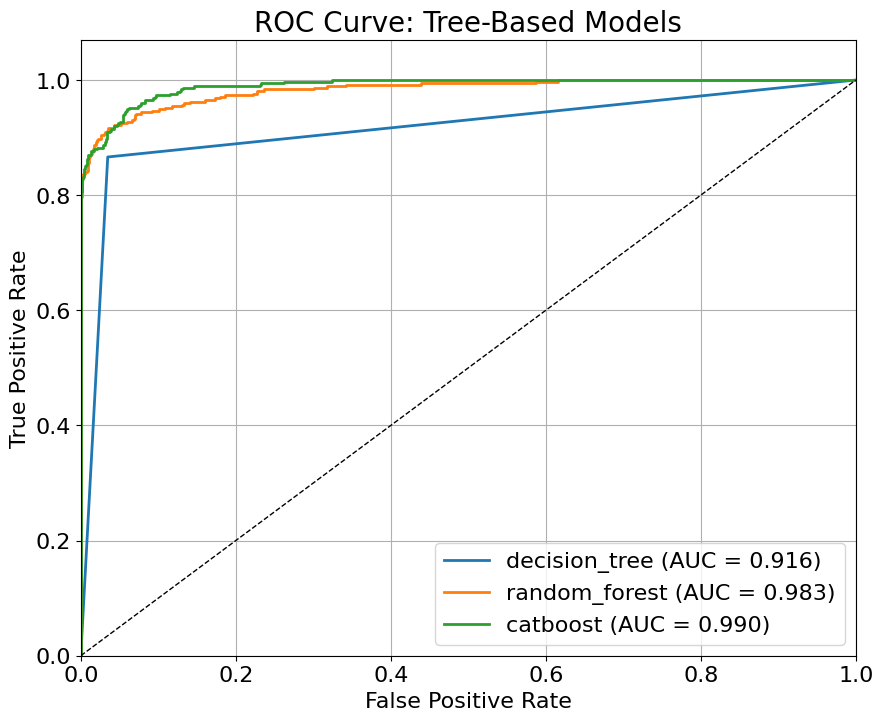

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline

models_to_plot = [
    "decision_tree",
    "random_forest",
    "catboost"
]

plt.figure(figsize=(10,8))

for name in models_to_plot:
    model = classifiers[name]

    pipeline = Pipeline([('classifier', model)])
    pipeline.fit(X_train, y_train)

    if hasattr(pipeline, "predict_proba"):
        y_score = pipeline.predict_proba(X_test)[:,1]
    else:
        scores = pipeline.decision_function(X_test)
        y_score = (scores - scores.min()) / (scores.max() - scores.min())

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2,label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.07])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve: Tree-Based Models", fontsize=20)
plt.tick_params(axis='both',labelsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.grid(True)
plt.show()

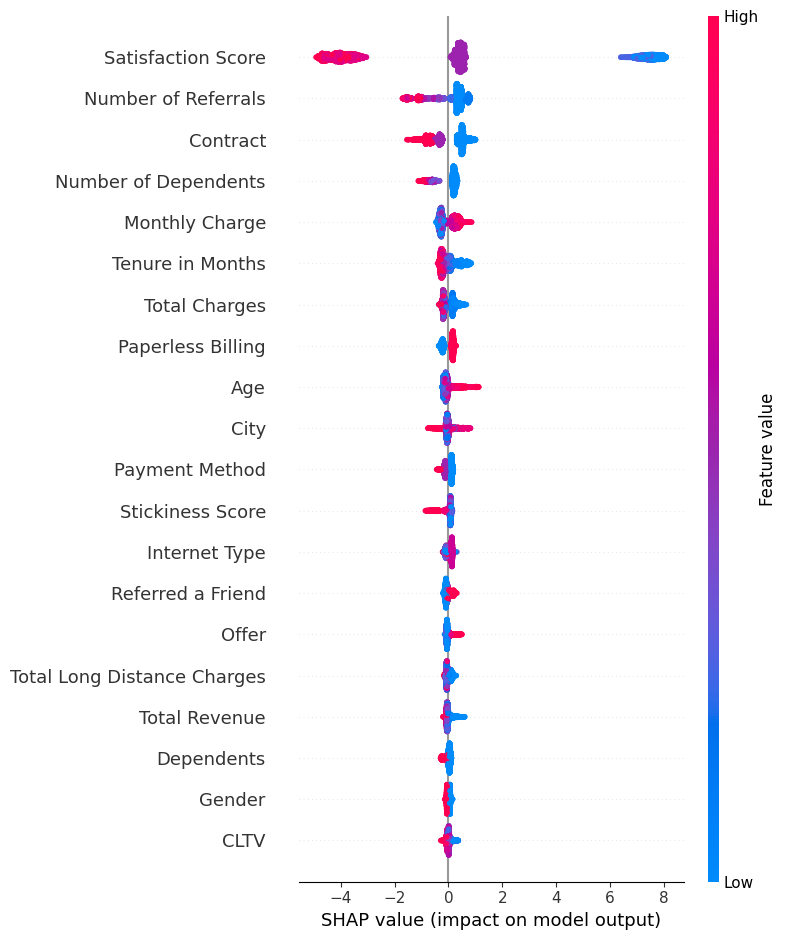

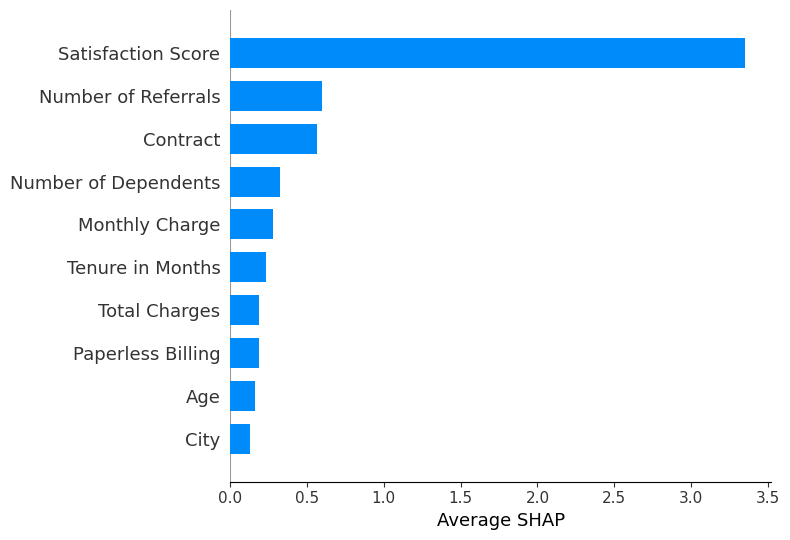

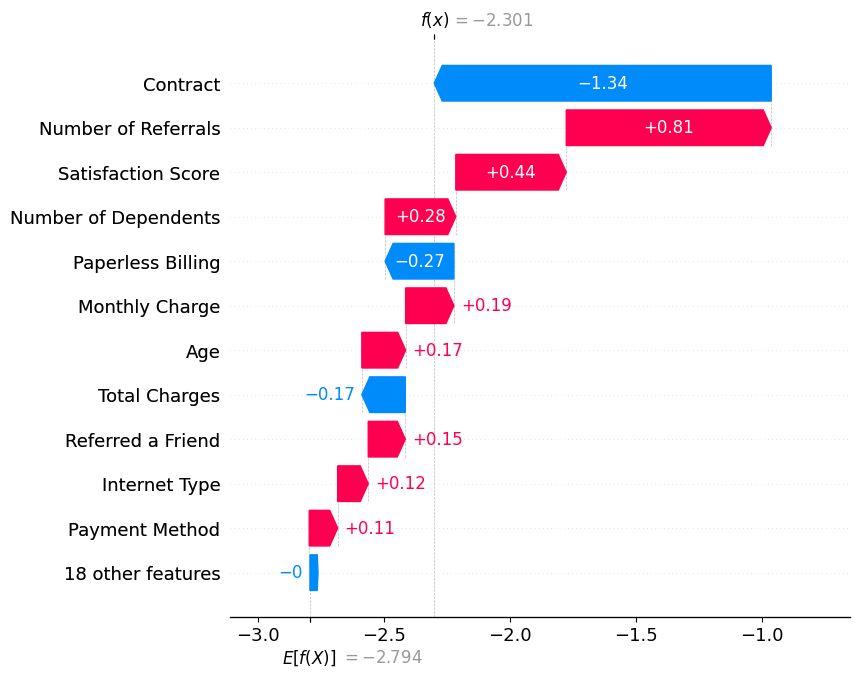

In [90]:
import shap
from catboost import Pool


shap_pool = Pool(X_train, y_train)

shap_importance = grid_search_cv.best_estimator_.get_feature_importance(
    data=shap_pool,
    type="ShapValues"
)

shap_importance = shap_importance[:,:-1]

X_shap = X_train.copy()

plt.figure(figsize=(20, 10))
shap.summary_plot(
    shap_importance,
    X_shap,
    plot_type="dot",
    max_display=20
)

plt.figure(figsize=(20,10))

shap.summary_plot(
    shap_importance,
    X_shap,
    plot_type="bar",
    max_display=10,
    show=False   
)

plt.xlabel("Average SHAP")
plt.tight_layout()
plt.show()


cust_idx = 0

customer_pool = Pool(X_train.iloc[[cust_idx]], y_train.iloc[[cust_idx]])

shap_vals_customer = grid_search_cv.best_estimator_.get_feature_importance(
    data=customer_pool,
    type="ShapValues"
)
shap_vals_customer = shap_vals_customer[:,:-1].flatten()

base_value = grid_search_cv.best_estimator_.get_feature_importance(
    data=Pool(X_train, y_train),
    type="ShapValues"
)[0,-1]

expl = shap.Explanation(
    values=shap_vals_customer,
    base_values=base_value,
    data=None,
    feature_names=X_train.columns
)

plt.figure(figsize=(20,10))
shap.plots.waterfall(expl, max_display=12)